In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns




# Prepare a color palette, useful later
sns.set_theme(palette='flare', style='darkgrid')
palette = []
for color in mcolors.TABLEAU_COLORS.values():
      palette.append(color)

c:\Users\aless\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (9,10,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


c:\Users\aless\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


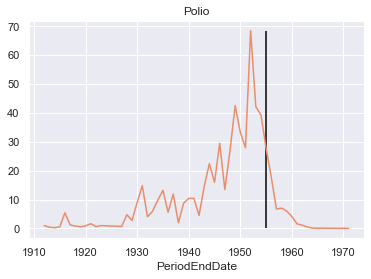

c:\Users\aless\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (9,10,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


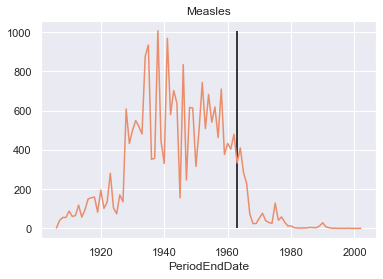

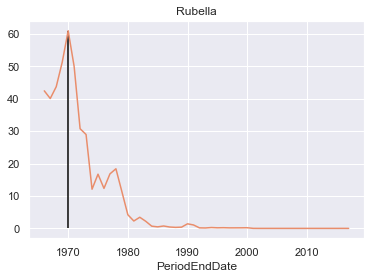

In [29]:
filenames       = ["polio.csv", "measles.csv",  "rubella.csv"]
disease_strings = ["Polio",     "Measles",      "Rubella"]
vaccine_years   = [1955,        1963,           1970]

for filename, disease_string, vaccine_year in zip(filenames, disease_strings, vaccine_years):
    data     = pd.read_csv(filename)
    data = data[data['Fatalities']==0]
    parsed = data[data['PartOfCumulativeCountSeries']==0].copy()
    parsed.PeriodEndDate = data[data['PartOfCumulativeCountSeries']==0].PeriodEndDate.apply(lambda x: int(x[0:4]))
    parsed = parsed.groupby(by=['PeriodEndDate']).CountValue.sum()/1000

    parsed_cumulative = data[data['PartOfCumulativeCountSeries']==1].copy()
    parsed_cumulative.PeriodEndDate = data[data['PartOfCumulativeCountSeries']==1].PeriodEndDate.apply(lambda x: int(x[0:4]))
    parsed_cumulative = parsed_cumulative.groupby(by=['PeriodEndDate']).CountValue.max()/1000

    parsed_total = parsed.add(parsed_cumulative, fill_value=0)

    parsed_total.plot.line()
    plt.vlines(vaccine_year, 0, parsed_total.max())
    plt.title(disease_string)
    plt.show()